<h1 style="color:Blue">Project 03: Customer Service Requests Analysis</h1>
<small>prepared by - Md. Mushtaque Ansari</small> 

<p><i>Import Required libraries.</i></p>

In [1058]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import datetime module
import datetime
# import f_oneway from scipy.stats library
from scipy.stats import f_oneway

<p>Import csv file into a pandas DataFrame.</p>


In [1059]:
dataset = pd.read_csv('D:\Complete MD\Simplilearn Data Scientist\Python Training\Data-Science-with-Python-Project-2--master\Data-Science-with-Python-Project-2--master\Data Science with Python Two/311_Service_Requests_from_2010_to_Present.csv')

In [1060]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
Unique Key                        300698 non-null int64
Created Date                      300698 non-null object
Closed Date                       298534 non-null object
Agency                            300698 non-null object
Agency Name                       300698 non-null object
Complaint Type                    300698 non-null object
Descriptor                        294784 non-null object
Location Type                     300567 non-null object
Incident Zip                      298083 non-null float64
Incident Address                  256288 non-null object
Street Name                       256288 non-null object
Cross Street 1                    251419 non-null object
Cross Street 2                    250919 non-null object
Intersection Street 1             43858 non-null object
Intersection Street 2             43362 non-null object
Address Type                      29

<p>Lets analysis the data, and <strong>remove null value</strong> data or columns. <br>
    There are couple of columns which are not relevant to analysis and it's save 
to drop these columns. For example 'Agency' colun, hence 'Agency Name' both have similar values. 
Few columns doesn't contain any value we can remove thoese column too.<br>
    <i>We need to change Created Date & Closed Date datatype</i><p> 

In [1061]:
#Drop above defined columns.
remove_unrelevant_columns= ['Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 2','Intersection Street 1',
'Intersection Street 2','Address Type','Park Facility Name','Park Borough','School Name',
'School Number','School Region','School Code','School Phone Number','School Address','School City',
'School State','School Zip','School Not Found','School or Citywide Complaint','Vehicle Type',
'Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction',
'Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name','Landmark',
'X Coordinate (State Plane)','Y Coordinate (State Plane)','Due Date','Resolution Action Updated Date','Community Board','Facility Type',
'Location']

In [1062]:
dataset.drop(remove_unrelevant_columns, inplace=True, axis=1)


In [1063]:
dataset.head(5)

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Status,Resolution Description,Borough,Latitude,Longitude
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,Closed,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,Closed,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,Closed,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.835994,-73.828379
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,Closed,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170


In [1064]:
dataset.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'City', 'Status',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude'],
      dtype='object')

<p> Checking city wise service request count</p>

In [1065]:
dataset['City'].value_counts()

BROOKLYN               98307
NEW YORK               65994
BRONX                  40702
STATEN ISLAND          12343
JAMAICA                 7296
ASTORIA                 6330
FLUSHING                5971
RIDGEWOOD               5163
CORONA                  4295
WOODSIDE                3544
SOUTH RICHMOND HILL     2774
OZONE PARK              2755
EAST ELMHURST           2734
ELMHURST                2673
WOODHAVEN               2464
MASPETH                 2462
LONG ISLAND CITY        2437
SOUTH OZONE PARK        2173
RICHMOND HILL           1904
FRESH MEADOWS           1899
QUEENS VILLAGE          1814
MIDDLE VILLAGE          1765
JACKSON HEIGHTS         1689
FOREST HILLS            1688
REGO PARK               1486
BAYSIDE                 1221
COLLEGE POINT           1220
FAR ROCKAWAY            1179
WHITESTONE              1098
HOLLIS                  1012
HOWARD BEACH             931
ROSEDALE                 922
SPRINGFIELD GARDENS      883
SAINT ALBANS             834
KEW GARDENS   

In [1066]:
dataset.count()

Unique Key                300698
Created Date              300698
Closed Date               298534
Agency                    300698
Complaint Type            300698
Descriptor                294784
Location Type             300567
Incident Zip              298083
City                      298084
Status                    300698
Resolution Description    300698
Borough                   300698
Latitude                  297158
Longitude                 297158
dtype: int64

In [1067]:
#check datatype
dataset.dtypes

Unique Key                  int64
Created Date               object
Closed Date                object
Agency                     object
Complaint Type             object
Descriptor                 object
Location Type              object
Incident Zip              float64
City                       object
Status                     object
Resolution Description     object
Borough                    object
Latitude                  float64
Longitude                 float64
dtype: object

# Convert the columns ‘Created Date’ and Closed Date’ to datetime datatype

In [1068]:
#now changing Created Date datatype to date
dataset['Created Date'] = pd.to_datetime(dataset['Created Date'])
#now changing Closed Date datatype to date
dataset['Closed Date'] = pd.to_datetime(dataset['Closed Date'])


In [1069]:
array_columns = ['Created Date','Closed Date']

In [1070]:
for col in dataset.columns:
    if dataset[col].nunique() < 300 and col not in array_columns:
        dataset[col] = dataset[col].astype('category')

In [1071]:
dataset.dropna(subset=['Created Date','Closed Date','City','Borough'], inplace=True)

In [1072]:
#dataset.dtypes
dataset["Request_Closing_Time"] = dataset["Closed Date"] - dataset["Created Date"]

In [1073]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298028 entries, 0 to 300697
Data columns (total 15 columns):
Unique Key                298028 non-null int64
Created Date              298028 non-null datetime64[ns]
Closed Date               298028 non-null datetime64[ns]
Agency                    298028 non-null category
Complaint Type            298028 non-null category
Descriptor                292122 non-null category
Location Type             297906 non-null category
Incident Zip              298024 non-null category
City                      298028 non-null category
Status                    298028 non-null category
Resolution Description    298028 non-null category
Borough                   298028 non-null category
Latitude                  297061 non-null float64
Longitude                 297061 non-null float64
Request_Closing_Time      298028 non-null timedelta64[ns]
dtypes: category(9), datetime64[ns](2), float64(2), int64(1), timedelta64[ns](1)
memory usage: 18.8 MB


In [1074]:
#Now we are ready for Data Analysis and Visualization

In [1075]:
#checking start ate and end date of dataset
print('Start from : ',min(dataset['Created Date']))
print('Till : ',max(dataset['Created Date']))

Start from :  2015-03-29 00:33:01
Till :  2015-12-31 23:59:45


<p>As shown above, we have the data for entire 2015 year.</p>

In [1076]:
#checking how many agency rais service request. 
dataset['Agency'].value_counts()

NYPD    298028
Name: Agency, dtype: int64

<p>Above count shows that we only have NYPD requests available in our DataFrame.</p>

In [1077]:
#Lets check complaints status.
statusCount = pd.DataFrame({'count':
                                  csra_df.groupby(['Status']).size()}).sort_values(['count'], ascending=True)

#now lets see status count
statusCount

,count
Status,
Draft,2
Assigned,786
Open,1439
Closed,298471


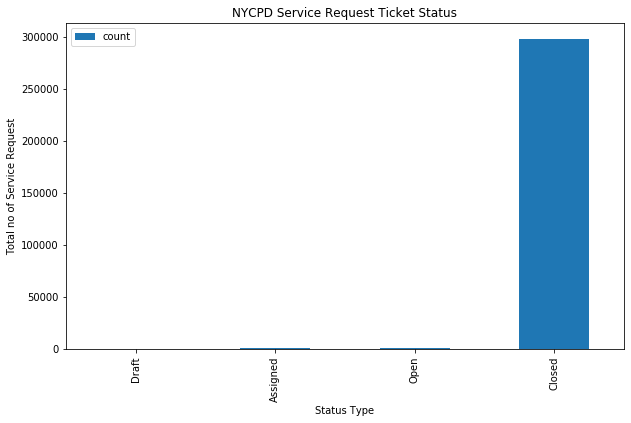

In [1078]:
#status of tickets
statusCount.plot(kind='bar',figsize=(10,6))
plt.xlabel("Status Type")
plt.ylabel("Total no of Service Request")
plt.title("NYCPD Service Request Ticket Status")
plt.legend()
plt.show()

In [1079]:
#Fetch percentage of status
statusCount['percentage'] = (statusCount['count'] / statusCount['count'].sum()) * 100
print(statusCount['percentage'])

Status
Draft        0.000665
Assigned     0.261392
Open         0.478553
Closed      99.259390
Name: percentage, dtype: float64


As per above graph, we can see there are total 300698 tickets out of which 99.25% ticket are closed only few are open or assigned.

<h3>Lets plot the number of complaints type received throughout 2015</h3>

In [1080]:
ComplaitTypeCount = pd.DataFrame({'count':
                                  csra_df.groupby(['Complaint Type'],).size()}).sort_values(['count'], ascending=True)
ComplaitTypeCount

,count
Complaint Type,
Animal in a Park,1
Ferry Complaint,2
Squeegee,4
Agency Issues,6
Graffiti,113
Illegal Fireworks,168
Disorderly Youth,286
Panhandling,307
Bike/Roller/Skate Chronic,427


In [1081]:
ComplaitTypeCount['percentage'] = (ComplaitTypeCount['count'] / ComplaitTypeCount['count'].sum()) * 100
ComplaitTypeCount['percentage'].tail() #showing last 5

Complaint Type
Derelict Vehicle            5.892291
Noise - Commercial         11.831472
Noise - Street/Sidewalk    16.166386
Illegal Parking            25.062022
Blocked Driveway           25.621720
Name: percentage, dtype: float64

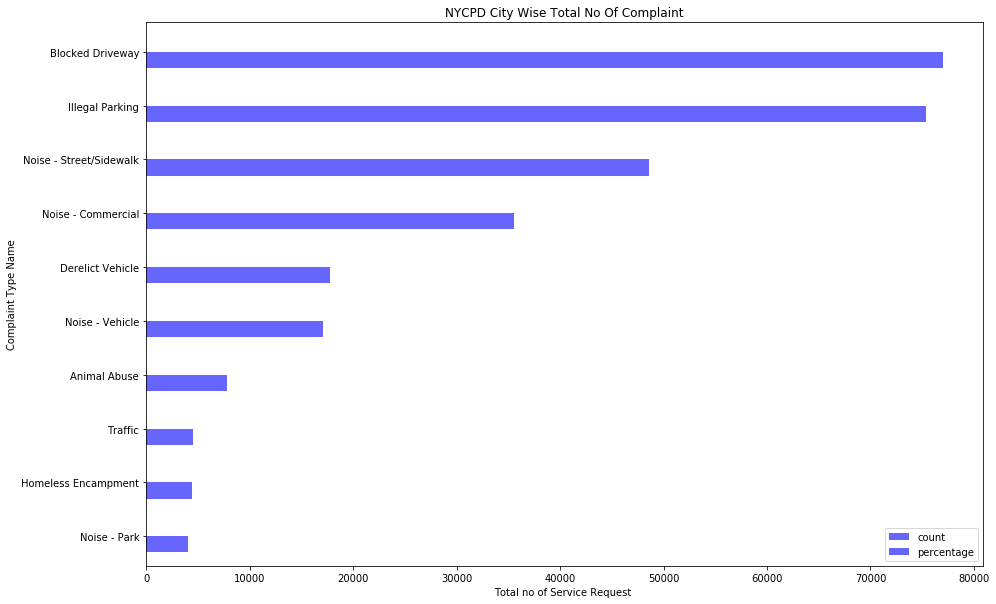

In [1082]:
#Now lets create graph to analysis top 10 complaint type 
ComplaitTypeCount.tail(10).plot(kind='barh',alpha=0.6,figsize=(15,10),width = 0.6,color='b')
plt.xlabel("Total no of Service Request ")
plt.ylabel("Complaint Type Name")
plt.title("NYCPD City Wise Total No Of Complaint")
plt.legend()
plt.show()

<p style="color:green">As shown above, highest number of complaints are of 'Blocked Driveway' type, followed by 'Illegal Parking' and 'Noise - Street/Sidewalk'.</p>

<h3>Now lets check city wise complaint type</h3>

In [1083]:

CityWiseComplaintCount = pd.DataFrame({'count':
                                  dataset.groupby(['City'],).size()}).sort_values(['count'], ascending=True)
CityWiseComplaintCount.tail(10)

,count
City,
WOODSIDE,3544
CORONA,4295
RIDGEWOOD,5162
FLUSHING,5970
ASTORIA,6330
JAMAICA,7294
STATEN ISLAND,12338
BRONX,40697
NEW YORK,65972


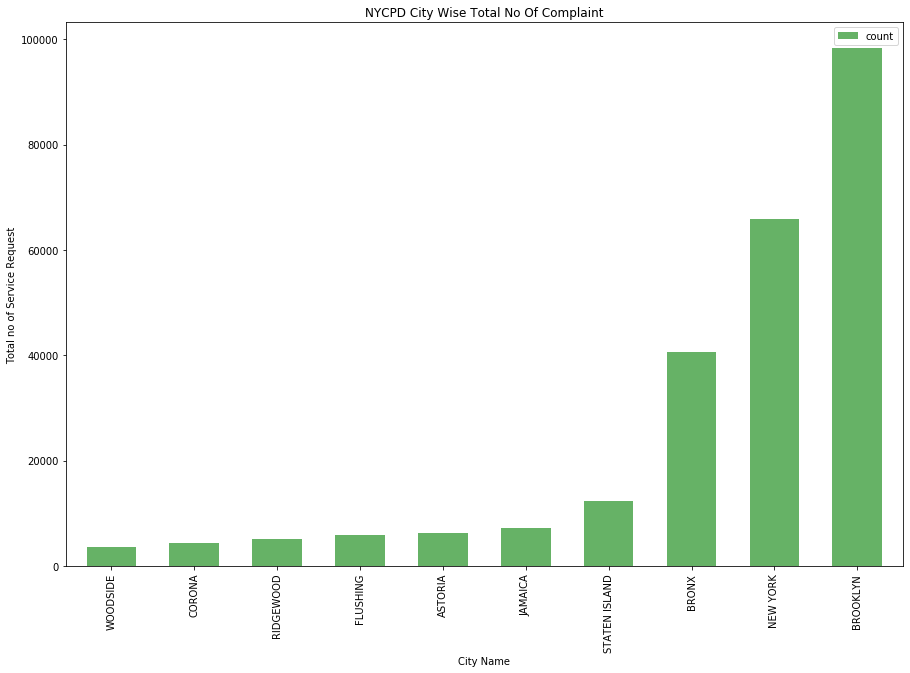

In [1084]:
#Now let's create graph for top 10 city with major no of complaint. 
CityWiseComplaintCount.tail(10).plot(kind='bar',alpha=0.6,figsize=(15,10),width = 0.6,color='g')
plt.xlabel("City Name")
plt.ylabel("Total no of Service Request")
plt.title("NYCPD City Wise Total No Of Complaint")
plt.legend()
plt.show()

<p>As per above graph and table we can see BROOKLYN people make higest no of complaint follow by New York an BRONX</p>

<h3 style="color:blue">Lets now plot top 5 of the highest complaint types with respect to Boroughs Columns.</h3>

In [1085]:
dataset['Borough'].unique() #checking Borough

[MANHATTAN, QUEENS, BRONX, BROOKLYN, STATEN ISLAND, Unspecified]
Categories (6, object): [MANHATTAN, QUEENS, BRONX, BROOKLYN, STATEN ISLAND, Unspecified]

In [1086]:
top6Complaints = ['Blocked Driveway','Illegal Parking','Noise - Commercial','Noise - Street/Sidewalk','Derelict Vehicle','Animal Abuse']
compBorough = dataset.groupby(['Borough','Complaint Type']).size().unstack()
compBorough = compBorough[top6Complaints]
compBorough.head() #head by default top 5


Complaint Type,Blocked Driveway,Illegal Parking,Noise - Commercial,Noise - Street/Sidewalk,Derelict Vehicle,Animal Abuse
Borough,,,,,,
BRONX,12754.0,7859.0,2433.0,8889.0,1952.0,1415.0
BROOKLYN,28147.0,27461.0,11458.0,13353.0,5179.0,2394.0
MANHATTAN,2070.0,12127.0,14544.0,20522.0,537.0,1525.0
QUEENS,31639.0,21978.0,6073.0,4406.0,8108.0,1876.0
STATEN ISLAND,2142.0,4886.0,677.0,816.0,1766.0,557.0


In [1126]:
BoroughTop5 = compBorough.head()

In [1127]:
BoroughTop5

Complaint Type,Blocked Driveway,Illegal Parking,Noise - Commercial,Noise - Street/Sidewalk,Derelict Vehicle,Animal Abuse
Borough,,,,,,
BRONX,12754.0,7859.0,2433.0,8889.0,1952.0,1415.0
BROOKLYN,28147.0,27461.0,11458.0,13353.0,5179.0,2394.0
MANHATTAN,2070.0,12127.0,14544.0,20522.0,537.0,1525.0
QUEENS,31639.0,21978.0,6073.0,4406.0,8108.0,1876.0
STATEN ISLAND,2142.0,4886.0,677.0,816.0,1766.0,557.0


<h4 style="color:blue">Lets now generate graph for top 5 of the highest complaint types with respect to Boroughs Columns.</h4>

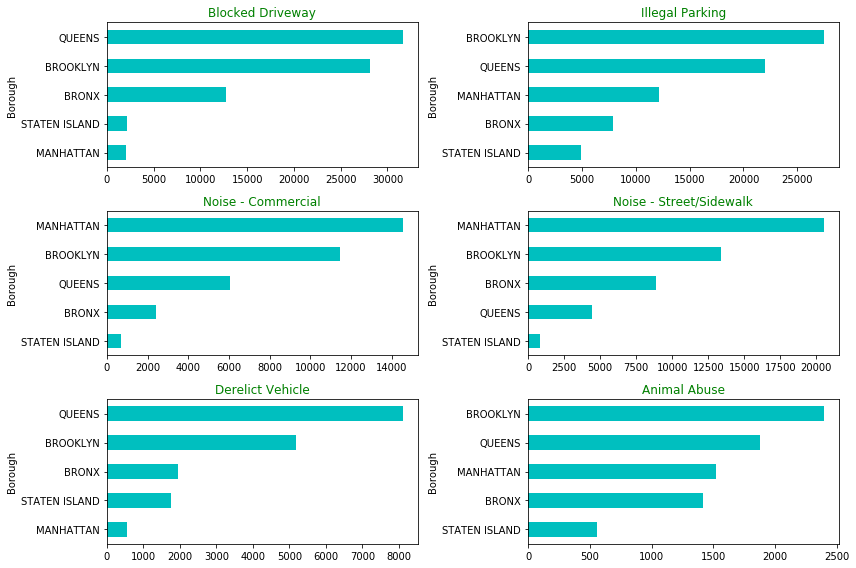

In [1089]:
col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,8))

for i, (label,col) in enumerate(BoroughTop5.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax,color='c')
    ax.set_title(label,color='g')
    
plt.tight_layout()

<h3 style="color:blue"> Insight of above generated graph:-</h3><br>
<ul><li><p><b>Queens</b> has highest complaints for <span style="color:red">'Blocked Driveway'</span> as well as for <span style="color:red">'Derelict Vehicle'<span>.</li>
<li><b>Brooklyn</b> has the most number of <span style="color:red">'Illegal parking'</span> complaints and is also on the top for <span style="color:red">'Animal Abuse'</span>.</li>
<li><b>Manhattan</b> is making most of the <span style="color:red">noise</span>, followed by <b>Brooklyn</b>.</li>

</ul>

In [1090]:
#Lets check total no of complaint city wise. 

In [1091]:
CityWiseComplaintCount = pd.DataFrame({'count':
                                  dataset.groupby(['City'],).size()}).sort_values(['count'], ascending=False)
CityWiseComplaintCount.head()


,count
City,
BROOKLYN,98295
NEW YORK,65972
BRONX,40697
STATEN ISLAND,12338
JAMAICA,7294


<p>As per above table, <i>BROOKLYN have more complaint count, followed by New York</i></p><br>
<h5>Now lets create bar graph for top 10 cities for highest number of complaints.</h5>

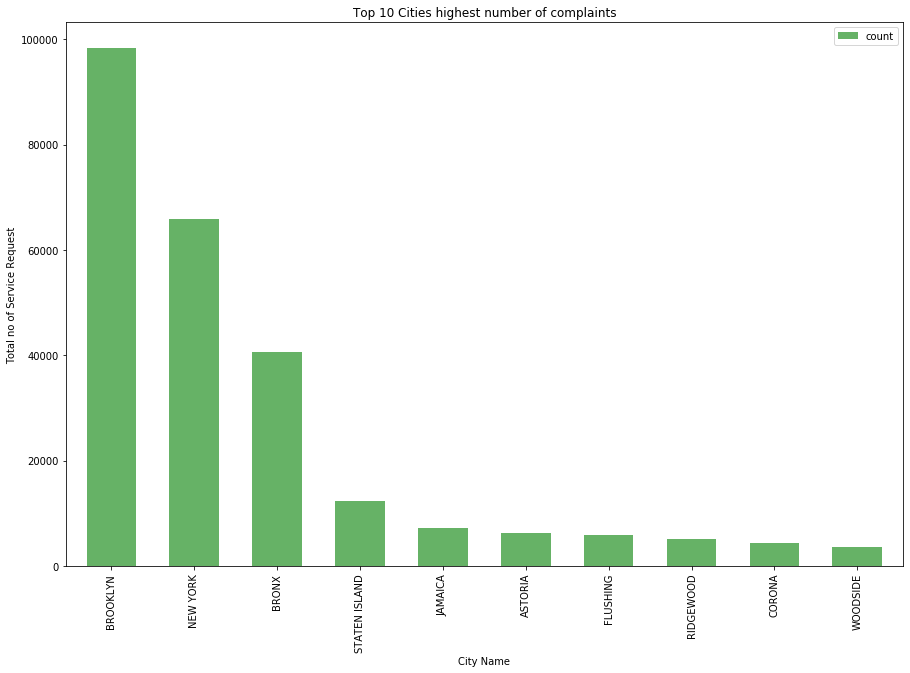

In [1092]:
#Now let's create graph for top 10 city with major no of complaint. 
CityWiseComplaintCount.head(10).plot(kind='bar',alpha=0.6,figsize=(15,10),width = 0.6,color='g')
plt.xlabel("City Name")
plt.ylabel("Total no of Service Request")
plt.title("Top 10 Cities highest number of complaints")
plt.legend()
plt.show()

<p ><strong>City wise, Brooklyn has the most number of Complaints followed by New York and BRONX.</strong><br>
<h4>Lets show graph against, complaints per Borough through the year, to support above graph</h></p>
Brooklyn raise highest number of complaints in May and September and least complaint in February.

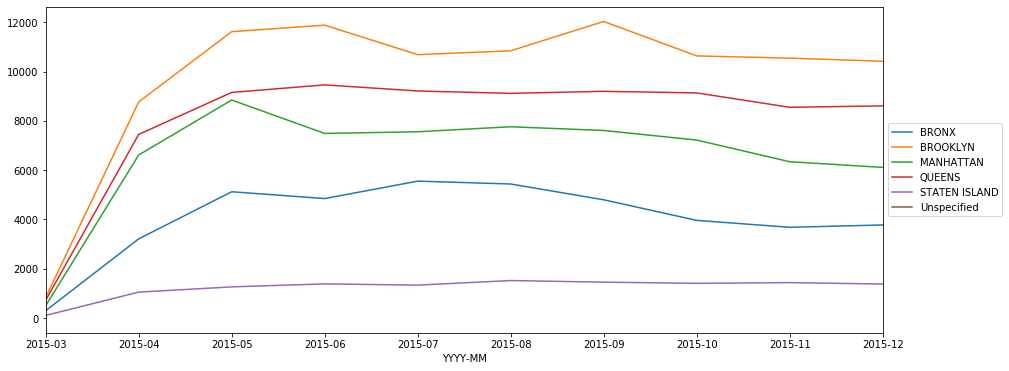

In [1093]:
# Complaints per Borough through the year
dataset['YYYY-MM'] = dataset['Created Date'].apply(lambda x: datetime.datetime.strftime(x, '%Y-%m'))
dataset.groupby(['YYYY-MM','Borough']).size().unstack().plot(figsize=(15,6))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

<h3 style="color:blue">Lets now breakdown the complaints for each Borough</h3>

<div style="background-color:yellow">

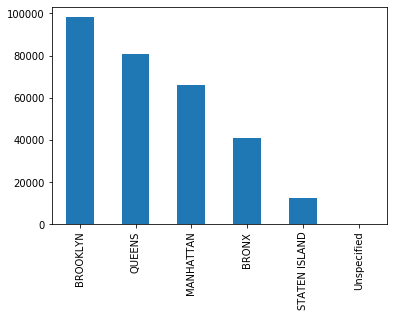

In [1094]:
dataset['Borough'].value_counts().plot(kind='bar')

</div>

Borough wise, Brooklyn has the most number of Complaints followed by Queens and Manhattan.

Lets plot a treemap of top 10 cities for highest number of complaints.

In [1095]:
borough_comp = dataset.groupby(['Complaint Type','Borough']).size().unstack()

In [1096]:
specified_borough = borough_comp.columns[:5]

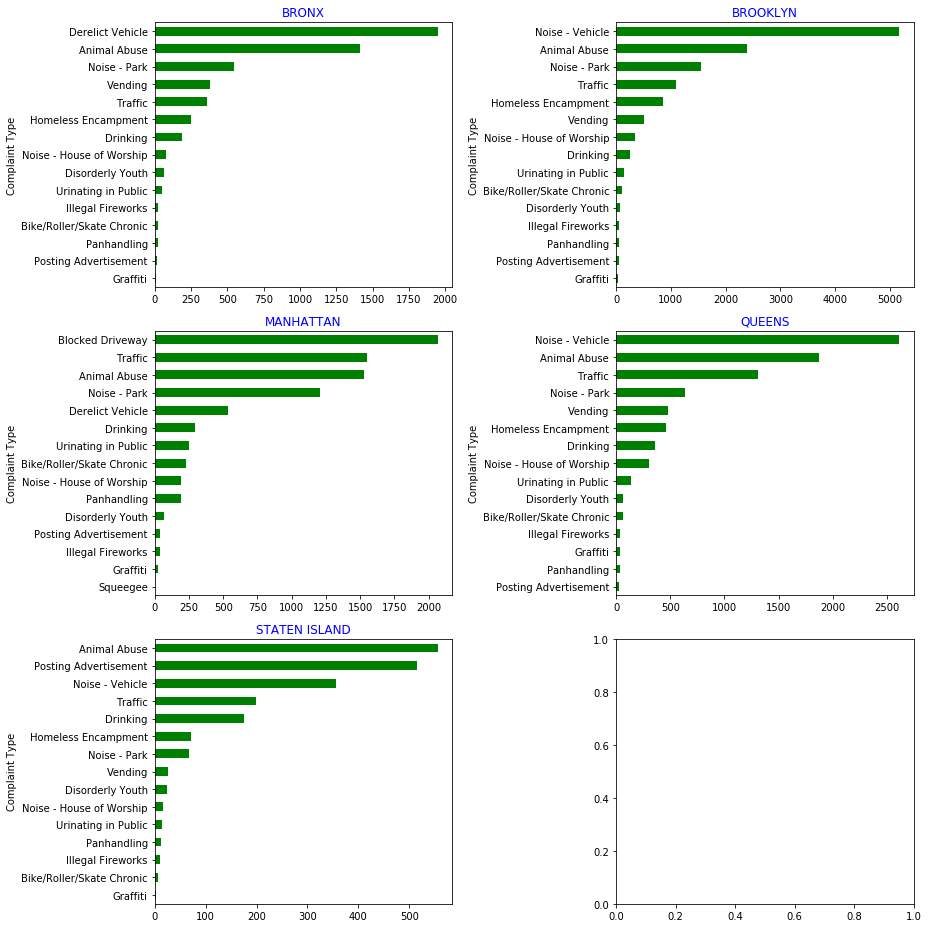

In [1097]:


col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(13,13))

for i, (label,col) in enumerate(borough_comp.iteritems()):
    if (label != 'Unspecified'): #don't create graph for unspecified borough
        ax = axes[int(i/col_number), i%col_number]
        col = col.sort_values(ascending=True)[:15]
        col.plot(kind='barh', ax=ax,color='g')
        ax.set_title(label,color='b')
        plt.tight_layout()

<p><ul><li style="color:blue">Manhattan has highest number of Noise complaints. Fortunaltely, parking in Manhattan is better than other Boroughs.</li>
    <li style="color:blue">
    Apart from Manhattan, number of Complaints for 'Blocked Driveway' and 'Illegal Parking' is highest for each Borough.</li>
</p>

<h4>Lets now move towrds the Request_Closing_Time of these complaints.</h4>

In [1098]:
dataset['Request_Closing_Time'].describe()

count                    298028
mean     0 days 04:18:22.338726
std      0 days 06:04:41.423014
min             0 days 00:01:00
25%             0 days 01:16:24
50%             0 days 02:42:36
75%      0 days 05:20:23.250000
max            24 days 16:52:22
Name: Request_Closing_Time, dtype: object

As per Request_Closing_Time description we can see time format on days. First we will convert our Request_Closing_Time from days to number of hours.

In [1099]:
dataset['Request_Closing_Hours'] = dataset['Request_Closing_Time'].astype('timedelta64[h]')
dataset[['Request_Closing_Time','Request_Closing_Hours']].head(10)


,Request_Closing_Time,Request_Closing_Hours
0,00:55:15,0.0
1,01:26:16,1.0
2,04:51:31,4.0
3,07:45:14,7.0
4,03:27:02,3.0
5,01:53:30,1.0
6,01:57:28,1.0
7,01:47:55,1.0
8,08:33:02,8.0
9,01:23:02,1.0


<p>In above table you can see Request_Closing_Hours for time '55:15' minutes is showing 0. We should consider it as 1 hours. So, we are going to add +1 to every hours.</p>

In [1100]:
dataset['Request_Closing_Hours'] = dataset['Request_Closing_Time'].astype('timedelta64[h]') + 1
dataset[['Request_Closing_Time','Request_Closing_Hours']].head(10)

,Request_Closing_Time,Request_Closing_Hours
0,00:55:15,1.0
1,01:26:16,2.0
2,04:51:31,5.0
3,07:45:14,8.0
4,03:27:02,4.0
5,01:53:30,2.0
6,01:57:28,2.0
7,01:47:55,2.0
8,08:33:02,9.0
9,01:23:02,2.0


<p>Since, we have added 1 and so now 1:26 hours is closed within 2 hours and so on...</p>

<h3> Now lets find out the mean and standard distribution of the data.</h3>

In [1101]:
mean = dataset['Request_Closing_Hours'].mean()
std = dataset['Request_Closing_Hours'].std()

print('Mean: ',mean)
print('Std: ',std)


Mean:  4.815839451326721
Std:  6.080002222807575


In [1102]:
dataset['Request_Closing_Hours'].sort_values(ascending=False).head(10)

244488    593.0
23664     578.0
21268     520.0
283132    337.0
12168     224.0
12167     224.0
11251     201.0
11254     201.0
11110     193.0
40690     170.0
Name: Request_Closing_Hours, dtype: float64

<p>As we can see, some of the closing times are too high. Lets create box plot to analysis the outlier</p>

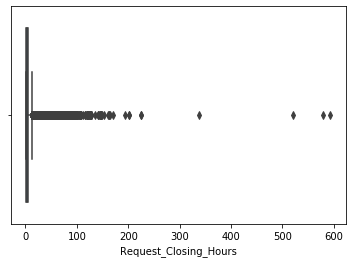

In [1103]:
ax = sns.boxplot(x=dataset['Request_Closing_Hours'])

As we can see, some of the closing times are too high and hence will be dealt as outliers.<br>
We will convert the Request Closing time to normal z statistics and will remove any record having value more than 1.<br>
z-statistic = (value-mean)/std<br>
Next we will plot the histogram of our Request_Closing_Time.

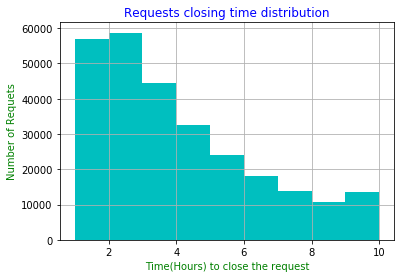

In [1104]:
plot_data = dataset[ ((dataset['Request_Closing_Hours']-mean)/std) < 1]
plot_data['Request_Closing_Hours'].hist(bins=9,color='c')
plt.xlabel('Time(Hours) to close the request',color='g')
plt.ylabel('Number of Requets',color='g')
plt.title('Requests closing time distribution',color='b')
plt.show()

<h5 style="color:purple"><li>Above distribution shows that around half of overall complaints were closed within 2 to 4 hours.</li><li>
    Around 99% of the complaints were closed within 10 hours.</li><h5>
    <p>Lets look at the closing complaint performance Boroughwise</p>

<hr>

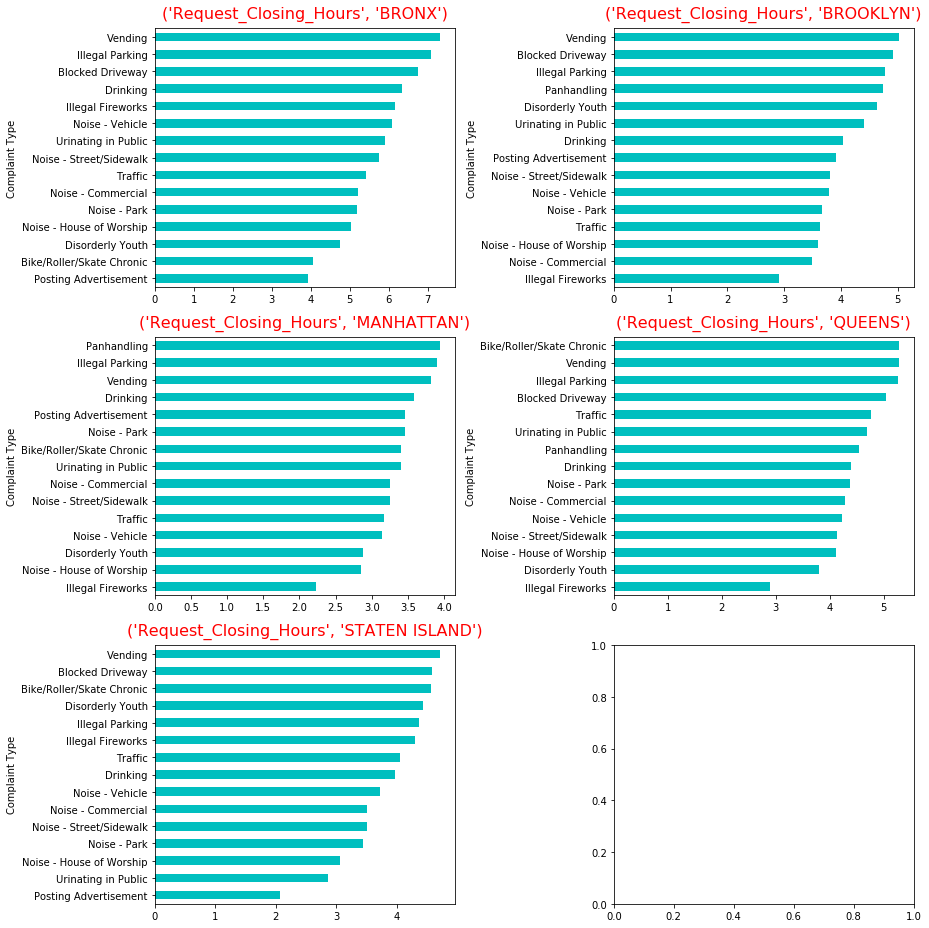

In [1105]:
cityWiseResolution = dataset.groupby(['Complaint Type','Borough'],sort=True)[['Request_Closing_Hours']].mean().unstack()

col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(13,13))

for i, (label,col) in enumerate(cityWiseResolution.iteritems()):
    if (label[1] != 'Unspecified'): #don't create graph for unspecified borough as its irrelevent. 
        ax = axes[int(i/col_number), i%col_number]
        col = col.sort_values(ascending=True)[:15]
        col.plot(kind='barh', ax=ax,color='c')
        ax.set_title(label,fontsize=16, pad=10,color="r")
    
plt.tight_layout()

Clealry <span style="color:red">'Graffiti'</span> complaints are taking a long time to be closed. Could be because the number of Graffiti complaints are very less and officials are focused on more pressing issues.<br>
<span style="color:green">Manhattan, Bronx and Queens</span> are handling <span style="color:red">'Disorderly Youth'</span> complaints very well.
<span style="color:green">Brooklyn</span> is performing well to close <span style="color:red">Noise and traffic</span> complaints.

<h4>Lets now analysis complaints monthly wise.</h4>

Text(0, 0.5, 'No Of Request')

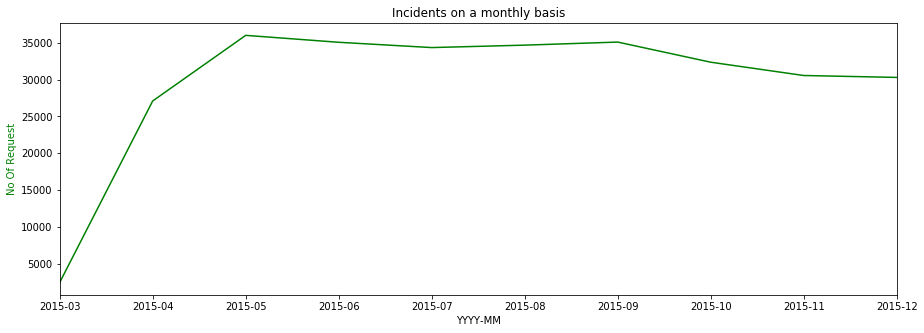

In [1106]:
dataset['YYYY-MM'] = dataset['Created Date'].apply(lambda time: datetime.datetime.strftime(time, '%Y-%m'))

#Incidents on a monthly basis
monthly_incidents =  dataset.groupby('YYYY-MM').size()
monthly_incidents.plot(figsize=(15,5), 
                       title='Incidents on a monthly basis',
                               color='g');
plt.ylabel('No Of Request',color='g')


<p>As per above graph we can see that highest number of complaints are regesiter between may 2015 to September 2015. 
    <br>January and Februray have the least number of complaints</p>

<div style="height:400px;width:100%;overflow:auto;background-color:#A3E4D7;color:black;scrollbar-base-color:gold;font-family:sans-serif;padding:10px;"> <h3 style="color:blue">Conclusion:</h3><br>
<div style="text-align:left; padding:10px 28px">
1. Most complaints raised in May and September, while least in February.<br>
2. Highest number of complaints raised are of 'Blocked Driveway'(26%).<br>
3. Second highest number of complaints are of Illegal Parking.(25%)<br>
4. Third highest number of complaints are of 'Noise - Street/Sidewalk'(16%).<br></div>

<h4>Below are city wise insight:- </h4>
<h3 style="color:blue">Brooklyn:</h3>
<ul style="text-align:left; padding:10px 28px">
    <li>Raises the most number of complaints as of 33%.</li>
    <li>Mostly 'Noise- Vehicle' complaints.</li>
    <li>Around 30% of 'Animal Abuse' complaints are raised from Brooklyn alone.</li>
    <li>Complaints are closed in second best average closing time. (4.5 hours per complaint)</li></ul>
<h3 style="color:blue">Bronx:</h3><br>
    <ul style="text-align:left; padding:10px 28px">
        <li>Number of Complaints around 13%.</li>
        <li>Mostly 'Blocked Driveway' and 'Illegal Parking' complaints. (55% of all complaints raised in Bronx)</li>
        <li>Complaints are closed in poorest closing time. (more than 6 hours per complaint)</li></ul>

<h3 style="color:blue">Manhattan:</h3>
<ul style="text-align:left; padding:10px 28px">
    <li>Number of complaints are around 20%.</li>
    <li>Mostly Noise related complaints. (55% including both streetwalk and commercial complaints)</li>
    <li>Complaints are closed in best closing time. (3.5 hours per complaint)</li></ul>
    <h3 style="color:blue">Staten Island:</h3>
<ul style="text-align:left; padding:10px 28px">
    <li>Lowest number of Complaints raised.(4%)</li>
<li>Mostly 'Blocked Driveway' and 'Illegal Parking' complaints. (60% of all complaints raised in Staten Island)</li>
    <li>Complaints are closed in average closing time.(4.5 hours per complaint)</li></ul>
    <h3 style="color:blue">Queens:</h3>
<ul style="text-align:left; padding:10px 28px">
    <li>Number of complaints are second highest at around 28%.</li>
<li>As Brooklyn, Mostly 'Blocked Driveway' and 'Illegal Parking' complaints. (68% of all complaints raised in Queens)</li>
<li>40% of all 'Blocked Driveway' complaints are raised from Queens.</li>
<li>45% of all 'Derelict Vehicle' complaints are raised from Queens.</li>
Complaints are closed poorly, in average closing time of 5 hours.</li></ul>
</div>

 <h3> Hypothesis testing<h3><h4>1. Whether the average response time across complaint types is similar or not (overall)</h4>
 


<p>To find out average response time we need to convert our hourly timedelta into minute for more precise results. </p>

In [1107]:
dataset['Request_Closing_Minutes'] = dataset['Request_Closing_Time'].astype('timedelta64[m]')+1
dataset['Request_Closing_Minutes'].head()

0     56.0
1     87.0
2    292.0
3    466.0
4    208.0
Name: Request_Closing_Minutes, dtype: float64

<p>Now lets see the distribution complaint type wise.<br>Below is the distribution of our Request_Closing_Minutes data for 'Blocked Driveway' complaint type.<br>For better representation we will put limit in the range to 1500.</p>

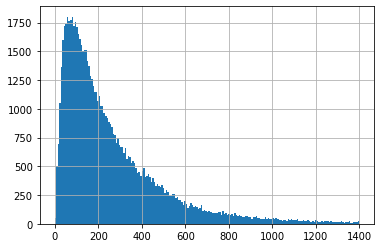

In [1108]:
original_blockedDriveway = dataset[dataset['Complaint Type']=='Blocked Driveway']['Request_Closing_Minutes']
original_blockedDriveway.hist(bins=200,range=(0,1400))
#Blocked Driveway Graph

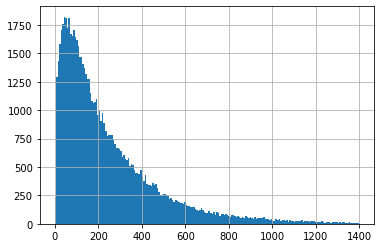

In [1109]:
original_IllegalParking = dataset[dataset['Complaint Type']=='Illegal Parking']['Request_Closing_Minutes']
original_IllegalParking.hist(bins=200,range=(0,1400))
#'Illegal Parking' graph

<li>We see a positive skewness in both data if we limit the range to 1400 for <span style="color:red">'Illegal Parking' & 'Blocked Driveway'</span></li>
<li>As our data contains too many outliers , hence we will transform the data using log transformation In</li>

In [1110]:
#Now lets describe original_IllegalParking variable and give statistics
original_IllegalParking.describe()

count    74311.000000
mean       269.853938
std        357.238742
min          3.000000
25%         84.000000
50%        176.000000
75%        342.000000
max      34642.000000
Name: Request_Closing_Minutes, dtype: float64

In [1111]:
#Now lets describe original_blockedDriveway variable and give statistics
original_blockedDriveway.describe()

count    76752.000000
mean       284.985017
std        334.234679
min          3.000000
25%         97.000000
50%        190.000000
75%        359.000000
max       8898.000000
Name: Request_Closing_Minutes, dtype: float64

<li>When we look at above original_blocked Driveway & original_IllegalParking statistics, it becomes clear that we have very few but very large values after th 75th percentile.</li>
<li>To removes the skewness from the data we need to take Log transformation</li>
<li>We will take the log of Request_Closing_Minutes for each complaint type and store in a dictionary.</li>


In [1112]:
data = {}
for complaint in dataset['Complaint Type'].unique():
    data[complaint] = np.log(dataset[dataset['Complaint Type']==complaint]['Request_Closing_Minutes'])

data.keys()

dict_keys(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling', 'Noise - Park', 'Homeless Encampment', 'Urinating in Public', 'Graffiti', 'Disorderly Youth', 'Illegal Fireworks', 'Squeegee', 'Animal in a Park'])

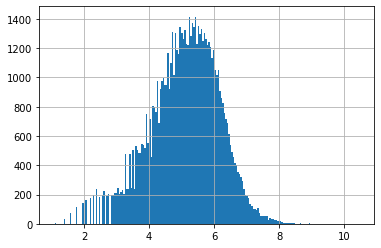

In [1113]:
data['Illegal Parking'].hist(bins=200)

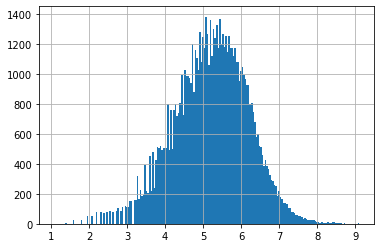

In [1114]:
data['Blocked Driveway'].hist(bins=200)

<div>As you can see Above distribution plot <span style="color:red"> "Blocked Driveway" & "Illegal Parking" </span>shows that once we apply log Transformation to our data, <span style="color:green"> skewness is almost removed and it looks more like a normal distribution.</span></div>

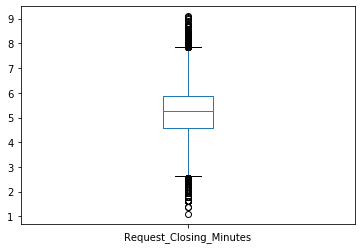

In [1115]:

data['Blocked Driveway'].plot(kind='box')

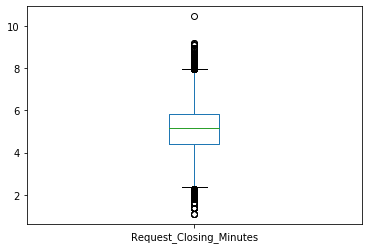

In [1116]:
data['Illegal Parking'].plot(kind='box')

In [1117]:
#Now lets print standard deviation for all complaint type
for complaint in data.keys():
    print(data[complaint].std())

1.088122697901445
0.9689131801038576
1.0669325650218924
1.2472412521336702
1.0740645608715385
1.1578783566404034
1.1940496830014724
1.0640501695025244
1.0353874715070719
1.098828353631681
1.1688314448754398
1.0354309769699395
1.1549910802980003
1.0578811759503506
1.103276477974517
1.02141533267075
1.0896898895618483
1.0581967861803852
1.0276748370244453
1.1905406895067956
0.8469384425802964
nan


Now we will futher move on to defining hypothesis and critical values.

<strong style="color:blue">Null Hypothesis:</strong> Average response time for all the complaints type is same.<br>

<strong style="color:blue">Alternate Hypothesis:</strong> Average response time for all the complaints type is not same and theres is some difference among the groups.

<div>To conduct our hypothesis test, we will conduct an ANOVA (analysis of variance) test as we have to compare the means of more than two groups.<br>
Below conditions should be met before conducting ANOVA.
<li>All distributions must follow a normal distributions curve. We have verified this after the log transformation</li>
    <li>Standard deviation for all groups must be same. Above output proves that this is true.</li>
    <li>All samples are drawn independently of each other.</li></div>

In [1118]:
[ complaint for complaint in data.keys() ]

['Noise - Street/Sidewalk',
 'Blocked Driveway',
 'Illegal Parking',
 'Derelict Vehicle',
 'Noise - Commercial',
 'Noise - House of Worship',
 'Posting Advertisement',
 'Noise - Vehicle',
 'Animal Abuse',
 'Vending',
 'Traffic',
 'Drinking',
 'Bike/Roller/Skate Chronic',
 'Panhandling',
 'Noise - Park',
 'Homeless Encampment',
 'Urinating in Public',
 'Graffiti',
 'Disorderly Youth',
 'Illegal Fireworks',
 'Squeegee',
 'Animal in a Park']

Below We conduct ANOVA test for top 5 type of complaints
For a 95% of confidence interval we choose our alpha as 0.05 for 5%
Alpha(0.05) is the critical p-value, if our calculated p-value is less than alpha, it will give us strong evidence to reject Null Hypothesis.

if p < alpha(0.05) : Reject Null Hypothesis, Average response time for all the complaints type is not same.

if p > alpha(0.05) : Fail to reject Null Hypothesis, Average response time for all the complaints type is same.

In [1119]:
stat, p = f_oneway(data['Blocked Driveway'],data['Illegal Parking'],data['Noise - Street/Sidewalk'],data['Noise - Commercial'],data['Derelict Vehicle'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=2469.077, p=0.000
Different distributions (reject H0)


As our p-value is quite low , hence it is being converted to 0.0
Since our p-value is lowere that our critical p-value, we will conclude that we have enogh evidence to reject pur Null Hypothesis and that

Average response time for all the complaints type is not same.

<h3 style="color:blue">2. Are the type of complaint or service requested and location related?</h3>

To find the correlation between location and complaint types, we will consider below columns
1. Complaint Type
2. Borough
3. City
4. Longitude
5. Latitude

In [1120]:
sample_data = dataset[['City','Complaint Type','Borough','Longitude','Latitude']]

In [1121]:
sample_data.head()

,City,Complaint Type,Borough,Longitude,Latitude
0,NEW YORK,Noise - Street/Sidewalk,MANHATTAN,-73.923501,40.865682
1,ASTORIA,Blocked Driveway,QUEENS,-73.915094,40.775945
2,BRONX,Blocked Driveway,BRONX,-73.888525,40.870325
3,BRONX,Illegal Parking,BRONX,-73.828379,40.835994
4,ELMHURST,Illegal Parking,QUEENS,-73.874170,40.733060


<p style="color:blue">As we can see our data in few columns such as Complaint Type, City, Borough is <b style="color:red">Categorical</b>, hence we can not directly apply <b style="color:red">corr()</b> method.<br></p>
<p><b>First we will convert the categorical data to numerical data by mapping the category to category codes.</b></p>

In [1122]:
sample_data['Complaint Type'] = sample_data['Complaint Type'].cat.codes
sample_data['Borough'] = sample_data['Borough'].cat.codes
sample_data['City'] = sample_data['City'].cat.codes

C:\Users\AL2676.ACCIONLABS\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\AL2676.ACCIONLABS\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\AL2676.ACCIONLABS\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [1123]:
sample_data.head()

,City,Complaint Type,Borough,Longitude,Latitude
0,33,16,2,-73.923501,40.865682
1,1,4,3,-73.915094,40.775945
2,6,4,0,-73.888525,40.870325
3,6,12,0,-73.828379,40.835994
4,13,12,3,-73.874170,40.733060


In [1124]:
sample_data.corr(method='kendall')

,City,Complaint Type,Borough,Longitude,Latitude
City,1.000000,0.059379,0.687066,-0.097893,-0.046158
Complaint Type,0.059379,1.000000,-0.056291,-0.140809,0.129429
Borough,0.687066,-0.056291,1.000000,0.080996,-0.085337
Longitude,-0.097893,-0.140809,0.080996,1.000000,0.246788
Latitude,-0.046158,0.129429,-0.085337,0.246788,1.000000


<p><b>As we can see from above table, there is no relationship between <span style="color:red">complaint type and location.</span></b><br>
<em>Which will be the general idea as in our data, most of the Complaint type are of <span style="color:green">'Blocked Driveway'</span> and <span style="color:green">'Illegal Parking'</span> which is common in all of the Boroughs.</em><p>

<b><hr></b>